# Music Streaming Royalty Analysis
### Introduction


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('royalties_cleaned.csv')
df['Sales Date'] = df['Sales Date'].astype('datetime64[ns]')
df.round(5).head()

,Sales Date,Quantity,Price,Subtotal,Album Name,Track Name,Partner Name,Transaction Type,Delivery Country
0,2017-08-15,7,0.00077,0.00541,Album_1,Track_1_1,Pandora,Stream,US
1,2017-08-15,1,0.00077,0.00077,Album_1,Track_1_2,Pandora,Stream,US
2,2017-08-15,2,0.00077,0.00155,Album_1,Track_1_3,Pandora,Stream,US
3,2017-08-15,40,0.00077,0.03094,Album_1,Track_1_4,Pandora,Stream,US
4,2017-08-15,36,0.00077,0.02785,Album_1,Track_1_5,Pandora,Stream,US


### Top streaming services
In order to compare the payments of different streaming services it is important to know which are the top services. Below is a pie chart showing the proportion of streams per service.

TO DO: clean up this code below

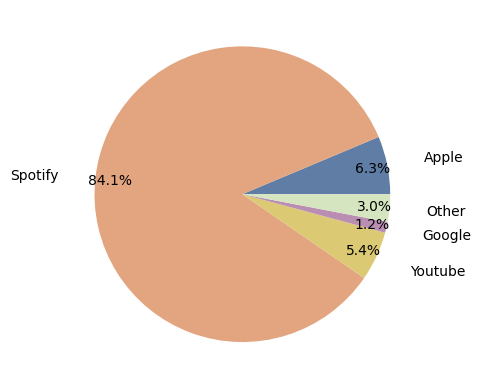

In [28]:
# Define plotting colors
blue = '#5F7DA5'
orange = '#E3A580'
gold = '#DCC973'
purple = '#BA8EB2'
green = '#D4E5BF'
colors = [blue, orange, gold, purple, green]


# Get total streams from each service
partners = df['Partner Name'].unique()
plays = []
for partner in partners:
    plays.append(sum(df[df['Partner Name'] == partner].Quantity))    
plays.sort(reverse=True)

# Get top four services
thresh = plays[3]
plays_dict = {}
for partner in partners:
    cur_plays = sum(df[df['Partner Name'] == partner].Quantity)
    if cur_plays >= thresh:
        plays_dict[partner] = cur_plays

# Create "other" category
rest = sum(plays[4:])
plays_dict['Other'] = rest

# Create pie chart
plt.pie(plays_dict.values(), labels=plays_dict.keys(), autopct='%1.1f%%',
       pctdistance=0.9, labeldistance=1.25, colors=colors)
plt.show()

# TO DO: ASSIGN COLORS TO SERVICES FOR CONSISTENCY

As expected, the most streams are coming from Spotify, by far. Apple, Youtube, and Google are a distant 2nd, 3rd, and 4th, respectively.

### Histograms of per-stream payment
Let's look at the distribution of per-stream royalty payments of our top two streaming services.

TO DO: try a subplot?

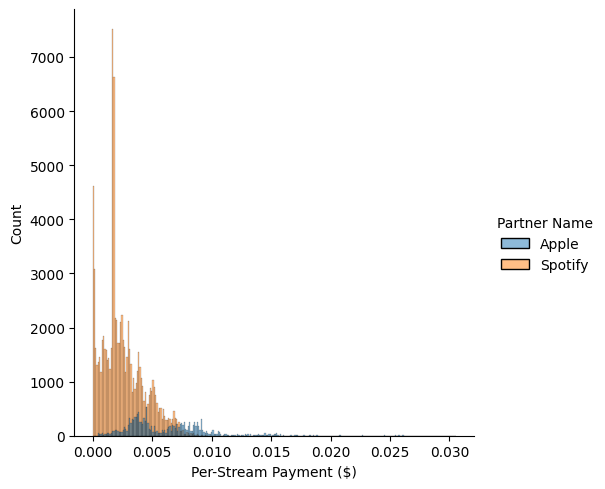

In [29]:
# Histograms of top services
apple_spotify = df[(df['Partner Name']=='Apple') | (df['Partner Name']=='Spotify')]
sns.displot(data=apple_spotify, x='Price', hue='Partner Name', color=colors[:2])
plt.xlabel('Per-Stream Payment ($)')
plt.show()

# for i, partner in enumerate(top_partners):
#     sns.displot(df[df['Partner Name']==partner].Price, kde=True, color=top_colors[i])
#     plt.title(partner + ' Per Stream Payment')
#     plt.xlabel('Per Stream Payment ($)')
#     plt.show()

Some takeaways from these histograms:
- The distributions are not normal, so any investigation into the difference should use a non-parametric test
- While Apple has contributed fewer streams overall, it appears to pay more per-stream than spotify

Let's look at the data in a few other ways.

### Violin plots and box plots of per-stream payments

TO DO: adjust colors and order of things

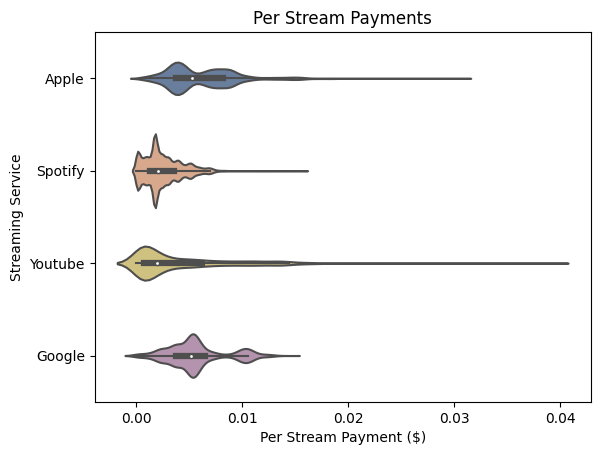

In [30]:
# Violin plots of top services
sns.violinplot(data=df[df['Partner Name'].isin(plays_dict.keys())],
               x='Price', y='Partner Name', palette=colors)
plt.title('Per Stream Payments')
plt.xlabel('Per Stream Payment ($)')
plt.ylabel('Streaming Service')
plt.show()

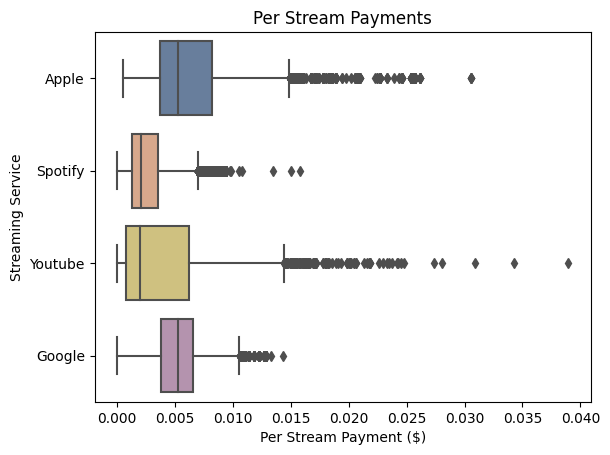

In [31]:
# Box plots of top services
sns.boxplot(data=df[df['Partner Name'].isin(plays_dict.keys())],
               x='Price', y='Partner Name', palette=colors)
plt.title('Per Stream Payments')
plt.xlabel('Per Stream Payment ($)')
plt.ylabel('Streaming Service')
plt.show()

This shows a little more clearly the difference in the per-stream payouts of the different streaming services. It looks like spotify and youtube are the worst while Apple and Google are a little better. Let's look at their median payment-per-stream amounts below.

In [32]:
for service in plays_dict.keys():
    if service in df['Partner Name'].unique():
        sub_df = df[df['Partner Name']==service]
        print("Median " + service + " Per-Stream Payment: " + str(round(np.median(sub_df.Price), 5)))

Median Apple Per-Stream Payment: 0.00529
Median Spotify Per-Stream Payment: 0.00203
Median Youtube Per-Stream Payment: 0.00196
Median Google Per-Stream Payment: 0.00521


We can see that Apple and Google both pay around half a cent per stream while both Spotify and Youtube pay around one-fifth of a penny per play.

But are these differences significant?

### Test significance of royalty payment difference

In [43]:
# TO DO: Change to Kruskal Wallis test with Bonferroni correction

# Test significance between payment differences of
price_list = [group['Price'].values for partner, group in df.groupby('Partner Name') if partner in plays_dict.keys()]


statistic, p = stats.kruskal(*price_list)

p_corrected = stats.multipletests(p, method='bonferroni')

p_corrected

# _, p = stats.mannwhitneyu(apple.Price.values, spotify.Price.values, alternative='two-sided')

# print(p)

AttributeError: module 'scipy.stats' has no attribute 'multipletests'

### Per-stream payment over time
Since there seems to be a lot of variability in the per-stream payment, it might be interesting to see how this metric has varied over time for each service.

In [ ]:
# Resample as monthly then replot the time-series data from above
for partner in top_partners:
    cur_df = df[df['Partner Name']==partner]
    grouped_data = cur_df.groupby(pd.Grouper(freq='M'))
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data.Price.median(), label=partner)

plt.title('Per Stream Payment Over Time')
plt.xlabel('Date')
plt.ylabel('Per Stream Payment ($)')

### Conclusion
Services x and y win while services a and b lose. 
Spotify has deals with major labels blah blah blah
Youtube is primarily ad-supported.
Clearly the more artist-friendly streaming services are :blank.
But, just because these services pay more doesn't necessarily mean they pay fairly.

TO DO: compare to album sales using billboard metric.

### Bonus visualization
Choropleth map of the world, showing where our music is most popular.